### Explicación Teorema de Bayes

El teorema de Bayes es un principio fundamental en teoría de probabilidad y estadísticas, que permite actualizar la probabilidad de una hipótesis en función de nueva evidencia. Fue desarrollado por el matemático y estadístico británico Thomas Bayes

$$P(A∣B)=\frac{P(B∣A)⋅P(A)}{P(B)}​$$

- P(A∣B) es la probabilidad de que la hipótesis A sea verdadera dado que se ha observado el evento B.
- P(B∣A) es la probabilidad de observar el evento B dado que la hipótesis A es verdadera.
- P(A) es la probabilidad inicial de que la hipótesis A sea verdadera (antes de observar B).
- P(B) es la probabilidad de observar el evento B.

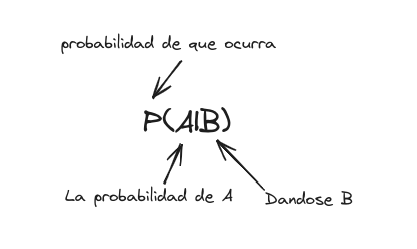

Una manera común de ver esto es mediante el arbol de probabilidad

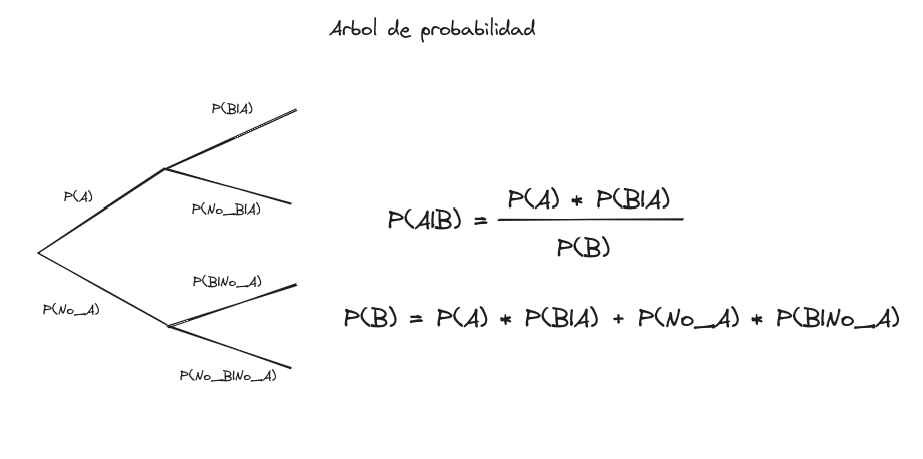

In [70]:
def teorema_de_bayes(prob_a, prob_b_dado_a, prob_b_dado_no_a):
    # Calcula la probabilidad de no A
    prob_no_a = 1 - prob_a
    
    # Calcula el numerador del teorema de Bayes
    numerador = prob_b_dado_a * prob_a
    
    # Calcula el denominador del teorema de Bayes
    denominador = numerador + prob_b_dado_no_a * prob_no_a
    
    # Calcula la probabilidad final de A dado B
    prob_a_dado_b = numerador / denominador
    
    return prob_a_dado_b



prob_a = 0.6  # Probabilidad de A
prob_b_dado_a = 0.47  # Probabilidad de B dado A
prob_b_dado_no_a = 0.3  # Probabilidad de B dado no A

# Calcula la probabilidad de A dado B
resultado = teorema_de_bayes(prob_a, prob_b_dado_a, prob_b_dado_no_a)

# Imprime el resultado
print(f"La probabilidad de A dado B es: {resultado:.4f}")


La probabilidad de A dado B es: 0.7015


In [71]:
import numpy as np
import plotly.graph_objs as go
from ipywidgets import interact



labels = ["A","No_A"]
widths = np.array([prob_a *100,(1-prob_a) *100])

data = {
    "B": [prob_b_dado_a*100,prob_b_dado_no_a*100],
    "No_B": [(1-prob_b_dado_a)*100,(1-prob_b_dado_no_a)*100]
}

fig = go.Figure()
for key in data:
    fig.add_trace(go.Bar(
        name=key,
        y=data[key],
        x=np.cumsum(widths)-widths,
        width=widths,
        offset=0,
        customdata=np.transpose([labels, widths*data[key]]),
        texttemplate="%{y} %",
        textposition="inside",
        textangle=0,
        textfont_color="white",
        hovertemplate="<br>".join([
            "Hypotesis: %{customdata[0]}",
            "Hypotesis Value: %{width}",
            "Percentage%: %{y}",
        ])
    ))

fig.update_xaxes(
    tickvals=np.cumsum(widths)-widths/2,
    ticktext= ["%s<br>%d" % (l, w) for l, w in zip(labels, widths)]
)

fig.update_xaxes(range=[0,100])
fig.update_yaxes(range=[0,100])

fig.update_layout(
    title_text="Bayes Theorem",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)

fig.show()